In [9]:
from scipy.stats.mstats_extras import mjci
from scipy.stats.mstats import mquantiles as mq
from radd.toolbox import analyze
from scipy.stats.mstats_extras import mjci
from radd import build

In [159]:
build=reload(build)
analyze=reload(analyze)

In [42]:
m=build.Model(data=prodf_store.prodata, kind='pro', tb=.56)
df=m.data
prob=array([.1,.3,.5,.7,.9]); 
tb=m.tb
as_ratio=True
split='HL'

In [57]:
nquant = len(prob)
ncond = len(df[split].unique())
xdf=df.copy()

# insert timeboundary
df['response']=np.where(xdf.rt<tb, 1, 0)
mjcix = lambda x: mjci(x.rt, prob=prob)

godf = xdf[(xdf.response==1)&(xdf.rt<tb)]
q_sem_obj = godf.groupby(['idx', 'HL']).apply(mjcix).values
#q_sem_obj = godf.groupby(['HL']).apply(mjcix).values

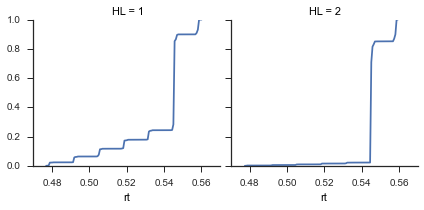

In [75]:
g = sns.FacetGrid(m.data, col='HL')
g.map(sns.kdeplot, 'rt', cumulative=True)

In [56]:
np.median(q_sem_obj[1])/q_sem_obj[1]

array([ 1.     ,  1.90511,  1.15259,  0.57196,  0.06147])

In [58]:
qwts = np.median(np.vstack(q_sem_obj.reshape(2,61).mean(axis=1)), axis=1)[:, None]/np.vstack(q_sem_obj.reshape(2,61).mean(axis=1))

In [377]:
m=build.Model(data=redata, kind='xradd')

In [380]:
m.avg_wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        0.6228 ,  1.0511 ,  1.28131,  1.17251,  0.89493,  0.23484,
        0.33851,  0.35909,  0.32923,  0.29119,  1.     ,  1.     ,
        1.     ,  1.     ,  1.     ,  1.     ,  0.63534,  0.91118,
        1.01531,  1.2369 ,  1.07818,  0.18009,  0.29296,  0.31591,
        0.31736,  0.27399])

In [286]:
prob=array([.1,.3,.5,.7,.9]); 
ncond=2
nquant=len(prob)
as_ratio=True
df = redata

In [296]:
.9*analyze.reactive_mj_quanterr(df)

array([[[ 0.59502,  1.00423,  1.22416,  1.12021,  0.85501],
        [ 0.69615,  1.00347,  1.06448,  0.97595,  0.8632 ]],

       [[ 0.61667,  0.88441,  0.98548,  1.20055,  1.0465 ],
        [ 0.61371,  0.99837,  1.07656,  1.08151,  0.93372]]])

In [237]:
qe = qerr.reshape(2,61,5).mean(axis=1)
np.mean(qe)/qe

array([[ 0.81613,  1.24069,  1.33945,  1.19748,  1.03362],
       [ 0.55717,  1.09256,  1.15654,  1.20727,  0.98372]])

In [287]:
mjcix = lambda x: mjci(x.rt, prob=prob)
ica_err = np.vstack(df.query('response==1').groupby(['idx', 'Cond', 'acc']).apply(mjcix).values)
#qe = qerr.reshape(ncond,int(len(qerr/2)),len(prob)).mean(axis=1)
#np.mean(qe)/qe

In [280]:
c_a_q

array([[[ 0.01879,  0.01114,  0.00914,  0.00998,  0.01308],
        [ 0.00843,  0.00585,  0.00551,  0.00601,  0.0068 ]],

       [[ 0.02159,  0.01505,  0.01351,  0.01109,  0.01272],
        [ 0.01054,  0.00648,  0.00601,  0.00598,  0.00693]]])

In [292]:
int(len(ica_err)/ncond/2)

61

In [293]:
# divide by 2 again because grouped by accuracy
qx = ica_err.reshape(ncond,int(len(ica_err)/ncond/2),nquant,ncond)
c_a_q = np.nanmean(qx, axis=1).reshape(ncond,2,nquant)
# axes: cond, acc, quants 
# get mean err across first two axes and divide by vals
qwts = np.mean(c_a_q, axis=2)[:,:,None]/c_a_q

In [294]:
qwts

array([[[ 0.66113,  1.11581,  1.36018,  1.24468,  0.95001],
        [ 0.7735 ,  1.11497,  1.18275,  1.08439,  0.95911]],

       [[ 0.68519,  0.98268,  1.09498,  1.33395,  1.16278],
        [ 0.6819 ,  1.1093 ,  1.19618,  1.20168,  1.03747]]])

In [297]:
go = m.data.groupby(['ttype', 'Cond']).mean()['response']
#st = m.data.query('ttype=="stop"').groupby('Cond').mean()['response']

In [306]:
qwts

array([[[ 0.66113,  1.11581,  1.36018,  1.24468,  0.95001],
        [ 0.7735 ,  1.11497,  1.18275,  1.08439,  0.95911]],

       [[ 0.68519,  0.98268,  1.09498,  1.33395,  1.16278],
        [ 0.6819 ,  1.1093 ,  1.19618,  1.20168,  1.03747]]])

In [317]:
qwts.reshape(4,5)

array([[ 0.66113,  1.11581,  1.36018,  1.24468,  0.95001],
       [ 0.7735 ,  1.11497,  1.18275,  1.08439,  0.95911],
       [ 0.68519,  0.98268,  1.09498,  1.33395,  1.16278],
       [ 0.6819 ,  1.1093 ,  1.19618,  1.20168,  1.03747]])

In [361]:
wtd_qwts = (np.vstack(go.unstack().unstack().values)*qwts.reshape(4,5)).reshape(2,10)#.reshape(2,2,5)

In [374]:
np.array([np.append(pwts, qw) for qw in wtd_qwts]).flatten()


array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        0.6228 ,  1.0511 ,  1.28131,  1.17251,  0.89493,  0.23484,
        0.33851,  0.35909,  0.32923,  0.29119,  1.     ,  1.     ,
        1.     ,  1.     ,  1.     ,  1.     ,  0.63534,  0.91118,
        1.01531,  1.2369 ,  1.07818,  0.18009,  0.29296,  0.31591,
        0.31736,  0.27399])

In [320]:
#bslwt, pnlwt = wt_qwts[0],  wt_qwts[1]

In [322]:
pnlwt

array([[ 0.20803,  0.29835,  0.33244,  0.405  ,  0.35303],
       [ 0.18009,  0.29296,  0.31591,  0.31736,  0.27399]])

In [120]:
ovals = m.observed.groupby('Cond').sem().loc[:, 'Go':]

In [133]:
np.mean(ovals.iloc[:, 6:])/ovals.iloc[:,6:]

,c10,c30,c50,c70,c90,e10,e30,e50,e70,e90
Cond,,,,,,,,,,
bsl,0.9285,0.9307,0.9054,0.9253,0.8925,1.0956,1.0217,0.9604,0.9259,0.8734
pnl,1.0835,1.0804,1.1167,1.0878,1.1370,0.9197,0.9792,1.0431,1.0870,1.1694


In [119]:
np.median(ovals.iloc[:,6:11], axis=1)[:,None]/ovals.iloc[:,6:11]


,c10,c30,c50,c70,c90
Cond,,,,,
bsl,1.1138,1.1032,1,0.9747,0.9362
pnl,1.0537,1.0383,1,0.9289,0.9670


In [104]:

ovals = m.observed.groupby('Cond').std().loc[:, 'Go':]#/m.observed.std()[:6]
np.median(ovals[:,:400], axis=1)[:, None]/ovals

TypeError: unhashable type

In [83]:
nc = m.ncond; cond=m.cond;
if m.data_style=='re':
      go = m.data.query('ttype=="go"').response.mean()
      st = m.data.query('ttype=="stop"').response.mean()
      if weight_by=='mj':
            qwts = analyze.reactive_mj_quanterr(df=m.data)
      else:
            obsrts = m.observed.loc[:, 'c10':]
            qwts = np.median(obsrts.std(axis=0))/obsrts.std(axis=0)
            qwts = np.vstack(qwts.values.reshape(nc,5))
      qwts = np.hstack(array([[go], [st]])*qwts)
      pwts = array([1,1,1,1,1,1])
      ovals = m.observed.groupby('Cond').std().loc[:, 'Go':]#/m.observed.std()[:6]
      np.median(ovals, axis=1)[:, None]/ovals
      m.flat_wts = np.hstack([pwts, qwts])
      m.avg_wts = np.tile(m.flat_wts, nc)
      
elif m.data_style=='pro':
      upper = m.data[m.data['HL']==1].mean()['response']
      lower = m.data[m.data['HL']==2].mean()['response']

      if weight_by=='mj':
            qwts = analyze.proactive_mj_quanterr(df=m.data, split='HL', tb=m.tb)
            qwts = np.hstack(np.array([upper, lower])[:,None]*qwts)
      else:
            qvar = m.observed.std().iloc[6:].values
            hi = qvar[:5]; lo = qvar[5:]
            qwts = np.hstack([upper*(hi[2]/hi), lower*(lo[2]/lo)])

      pwts = array([1,1,1,1,1,1])#np.median(pvar)/pvar
      m.avg_wts = np.hstack([pwts, qwts])

      nogo = m.avg_wts[:nc].mean(); quant=m.avg_wts[nc:].reshape(2, 5).mean(axis=0)
      m.flat_wts = np.hstack([nogo, quant])

      qwts = analyze.proactive_mj_quanterr(df=m.data, split='HL', tb=m.tb)
      qwts = np.hstack(np.array([upper, lower])[:,None]*qwts)
      #pwts = np.array([1.5,1,1,1,1,1.5])
      #pwts = np.array([1.5,1.25,1,1,1.25,1.5])
      pwts = np.median(m.observed.std()[:6])/m.observed.std()[:6]
      m.avg_wts = np.hstack([pwts, qwts])
      # calculate flat weights (collapsing across conditions)
      nogo = m.avg_wts[:nc].mean(); quant=m.avg_wts[nc:].reshape(2, 5).mean(axis=0)
      m.flat_wts = np.hstack([nogo, quant])

      ovar = m.observed.var().values
      qvar = array(array([[upper], [lower]])*(1/ovar[nc:].reshape(2,5))).flatten()
      m.qvar=qvar
      m.uwts = np.concatenate([1/ovar[:nc], qvar], axis=1).flatten()
      m.flat_uwts=np.append(m.uwts[:nc].mean(), m.uwts[nc:].reshape(2,5).mean(axis=0))

m.avg_wts, m.flat_wts = analyze.ensure_numerical_wts(m.avg_wts, m.flat_wts)
#m.avg_wts=np.ones_like(m.avg_wts); m.flat_wts=np.ones_like(m.flat_wts)


In [84]:
m.avg_wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        0.7354 ,  0.93408,  0.99221,  0.99656,  0.852  ,  0.18693,
        0.27972,  0.29962,  0.28591,  0.23456,  1.     ,  1.     ,
        1.     ,  1.     ,  1.     ,  1.     ,  0.7354 ,  0.93408,
        0.99221,  0.99656,  0.852  ,  0.18693,  0.27972,  0.29962,
        0.28591,  0.23456])

In [239]:
m.__remove_outliers__(sd=2.5)
analyze.proactive_mj_quanterr(m.data)

array([[ 0.25958,  1.     ,  2.05167,  2.50661,  0.43544],
       [ 0.8629 ,  1.     ,  1.12056,  1.25492,  0.13557]])

In [192]:
pwts, qwts = m.get_wts()

In [8]:
redata.groupby('Cond').apply(analyze.reactive_mj_quanterr).values[0]#.shape#reshape(2,5)

array([[ 0.6668 ,  1.02132,  1.08535,  1.     ,  0.87895],
       [     nan,  1.     ,  1.15488,  1.16127,  0.87805]])

In [154]:
df = m.data

In [2]:
prob=array([.1,.3,.5,.7,.9])

0.6536152

In [174]:
upper = m.data[m.data['HL']==1].mean()['response']

In [176]:
m.qwts

array([[ 0.24264,  1.     ,  2.6738 ,  1.94895,  0.45662],
       [ 0.19067,  1.     ,  1.69695,  1.63421,  0.41951]])

In [ ]:
q_sem_obj = godf.groupby(['idx', 'HL']).apply(mjcix).values
      qwts = np.median(np.vstack(q_sem_obj.reshape(2,61).mean(axis=1)), axis=1)[:, None]/np.vstack(q_sem_obj.reshape(2,61).mean(axis=1))


In [172]:
m.avg_wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        0.22189,  0.91449,  2.44517,  1.7823 ,  0.41757,  0.05262,
        0.27596,  0.46829,  0.45097,  0.11577])

In [382]:
m=build.Model(data=prodf_store.prodata, kind='pro', tb=.56)

In [384]:
m.avg_wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        0.32548,  1.22685,  5.27358,  3.70829,  0.90674,  0.09328,
        0.52865,  1.22075,  1.06581,  0.28346])

In [221]:
df = pd.read_csv(pth+'ELife/Data/pro_data.csv')

In [198]:
analyze.proactive_mj_quanterr(df)#.mean(axis=0)

array([[ 0.2653 ,  1.     ,  4.29846,  3.0226 ,  0.73908],
       [ 0.17645,  1.     ,  2.3092 ,  2.0161 ,  0.53621]])

In [232]:
tb=.560; split='HL'

godf = df[(df.response==1)&(df.rt<=tb)]  
nquant = len(prob)
ncond = len(godf[split].unique())

mjcix = lambda x: mjci(x.rt, prob=prob)
#godf = df[df.response==1].copy()
q_sem_obj = godf.groupby(['idx', 'HL']).apply(mjcix).values
qwts = np.mean(np.vstack(q_sem_obj.reshape(2,61).mean(axis=1)), axis=1)[:, None]/np.vstack(q_sem_obj.reshape(2,61).mean(axis=1))

In [226]:
godf.rt

0.5599845999999999

In [233]:
qwts

array([[ 0.35475,  1.33718,  5.74781,  4.04176,  0.98828],
       [ 0.33389,  1.89227,  4.36963,  3.81502,  1.01465]])

In [206]:
q_sem_obj.shape

(122,)

In [116]:
def proactive_mj_quanterr(df, split='HL', prob=array([.1,.3,.5,.7,.9]), tb=.560):
      
      godf = df[(df.response==1)&(df.rt<=tb)]  
      nquant = len(prob)
      ncond = len(godf[split].unique())
      q_sem_obj = godf.groupby(split).rt.apply(mjci, prob).values
      # hstack then reshape to automatically ensure float dtype (not object dtype)
      q_sem = np.hstack(q_sem_obj).reshape(ncond, nquant)
      qwts = np.median(q_sem, axis=1)[:,None]/q_sem
      return qwts
                  
                  
def reactive_mj_quanterr(df, avg_ssd=True, prob=array([.1,.3,.5,.7,.9])):
      
      cor = df.query('response==1&acc==1')
      err = df.query('response==1&acc==0')
      nssd = len(err.ssd.unique())
      nquant = len(prob)
      qe_var = np.hstack(err.groupby('ssd').rt.apply(mjci, prob)).reshape(nssd, nquant)
      qc_var = mjci(cor.rt.values, prob)
      # correct trial wts
      qcwts = np.median(qc_var)/qc_var
      # ss trial wts
      if avg_ssd:
            qewts = np.median(qe_var)/qe_var.mean(axis=1)
      else:
            qewts = np.median(qe_var,axis=1)[:,None]/qe_var
      return qcwts, qewts

In [123]:
from radd.toolbox import analyze

In [179]:
m.avg_wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        0.24341,  0.91749,  3.94381,  2.77322,  0.6781 ,  0.04929,
        0.27937,  0.64512,  0.56324,  0.1498 ])

In [180]:
analyze.proactive_mj_quanterr(df)

array([[ 0.2653 ,  1.     ,  4.29846,  3.0226 ,  0.73908],
       [ 0.17645,  1.     ,  2.3092 ,  2.0161 ,  0.53621]])

In [1]:
np.hstack(proactive_mj_quanterr(m.data)).reshape(2,5)

NameError: name 'proactive_mj_quanterr' is not defined

In [214]:
m.__remove_outliers__(2)

In [215]:
proactive_mj_quanterr(m.data)

array([[ 0.08614,  1.     ,  1.57865,  2.23218,  0.22066],
       [ 0.88342,  1.     ,  1.25132,  1.19866,  0.16524]])

In [112]:
proactive_mj_quanterr(df)

TypeError: can't multiply sequence by non-int of type 'float'

In [189]:
q = np.hstack(analyze.reactive_mj_quanterr(redata, avg_ssd=True))
q

array([ 0.06656,  1.24232,  0.01118,  1.53834,  1.     ,  0.36228,
        0.17871,  0.81474,  1.84892,  1.92326])

In [183]:
q

array([ 0.06656,  1.24232,  0.01118,  1.53834,  1.     ,  0.36228,
        0.17871,  0.81474,  1.84892,  1.92326])

In [179]:
q=q.reshape(2,5)

In [181]:
go = redata.query('ttype=="go"').response.mean()
st = redata.query('ttype=="stop"').response.mean()
array([[go], [st]])*q

array([[ 0.06221,  1.16111,  0.01045,  1.43778,  0.93463],
       [ 0.10283,  0.05073,  0.23127,  0.52482,  0.54592]])

In [6]:
np.median(mjci(cor.rt.values, prob))/mjci(cor.rt.values, prob)

array([ 0.06656,  1.24232,  0.01118,  1.53834,  1.     ])

In [8]:

np.median(mjci(err.rt.values, prob))/mjci(err.rt.values, prob)

array([  1.     ,   0.17432,  27.91884,   0.70715,  18.73337])